<a href="https://colab.research.google.com/github/JESSYCAMARTINS/kaggle/blob/main/Exerc%C3%ADcio_valor_de_a%C3%A7%C3%B5es_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pmdarima

import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd
from pandas_datareader import data as web
import datetime as dt
import yfinance as yfin


yfin.pdr_override()
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.0 MB/s eta 0:00:00


encontrar o código 

[site do yahoo](https://finance.yahoo.com/)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-20,7.35,7.41,7.25,7.31,6.363727,16360700
2020-02-21,7.18,7.29,7.15,7.24,6.302789,12530900
2020-02-24,6.96,7.05,6.85,7.00,6.093856,15167300
2020-02-25,7.02,7.03,6.82,6.88,5.989391,11463000
2020-02-26,6.93,7.03,6.70,6.79,5.911039,24595100
...,...,...,...,...,...,...
2021-02-12,4.67,4.78,4.66,4.69,4.188118,19945900
2021-02-16,4.78,4.79,4.62,4.72,4.214908,17725100
2021-02-17,4.72,4.72,4.61,4.69,4.188118,21553100


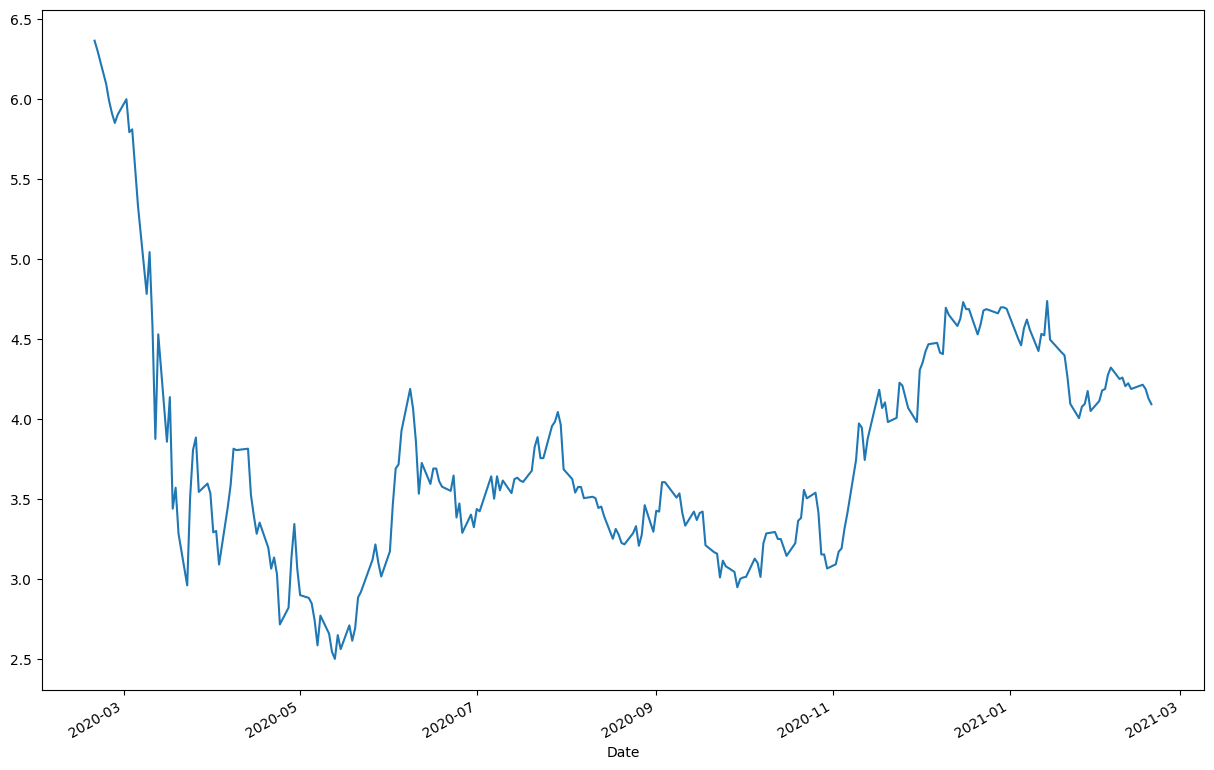

In [4]:
df = web.get_data_yahoo("BBD" , start=dt.datetime(2020,2,20), end=dt.datetime(2021,2,20))
display(df)
df["Adj Close"].plot(figsize=(15, 10))
plt.show()

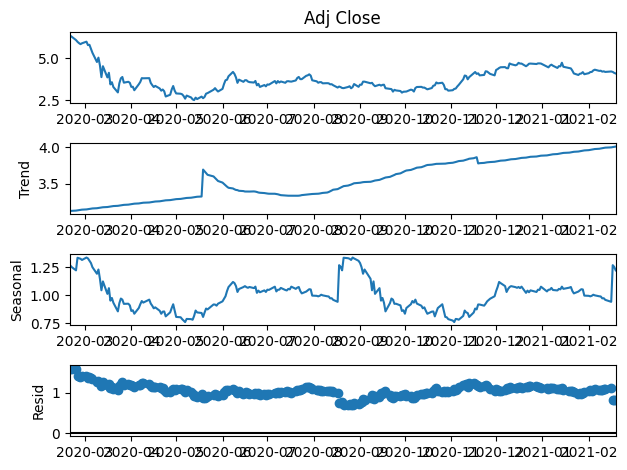

In [5]:
result = seasonal_decompose(df["Adj Close"], model='multiplicative',extrapolate_trend='freq', period = round(len(df)/2)-1)
result.plot();

adfuller $$p < 0.05$$


In [6]:
adfuller(result.resid)[1]

0.005237039283146175

[texto do link](https://people.duke.edu/~rnau/411arim.htm)

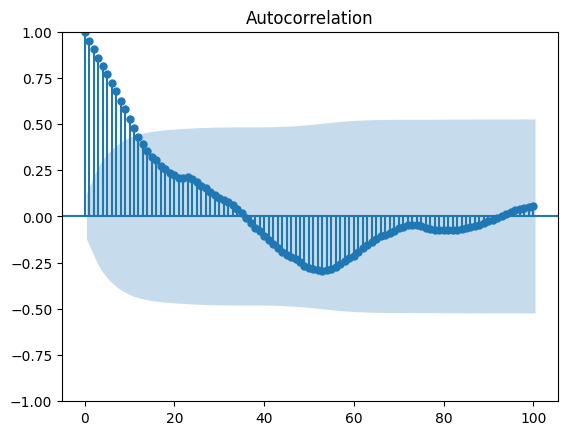

In [7]:
plot_acf(df['Adj Close'], lags = 100);

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


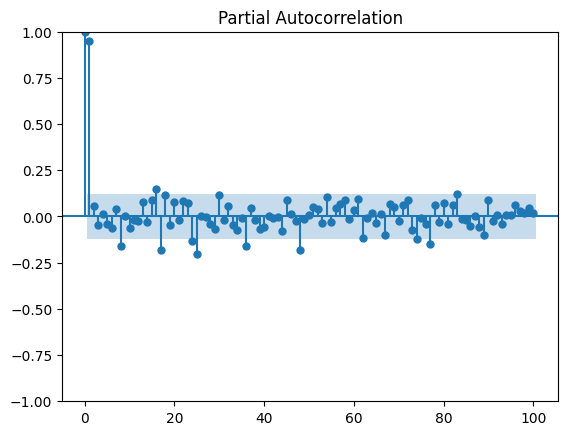

In [8]:
plot_pacf(df['Adj Close'], lags = 100);

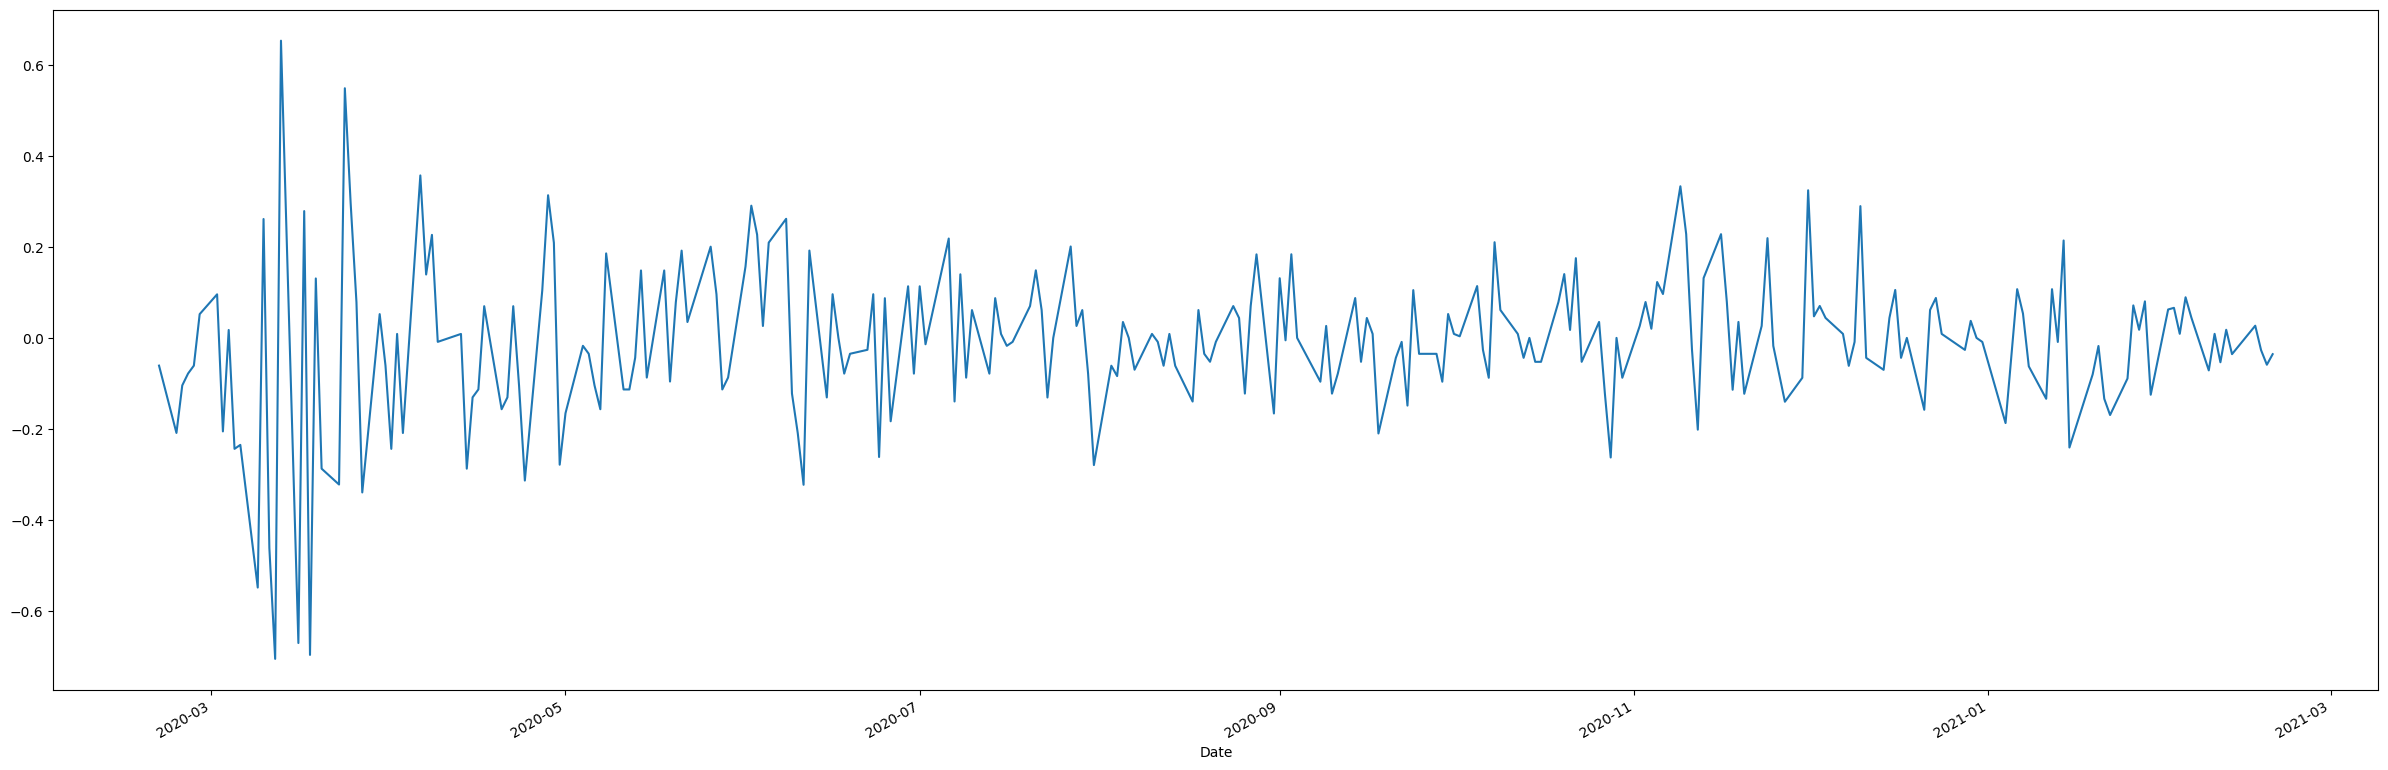

In [9]:
diff = df['Adj Close'].diff()
diff.plot(figsize=(30,10));

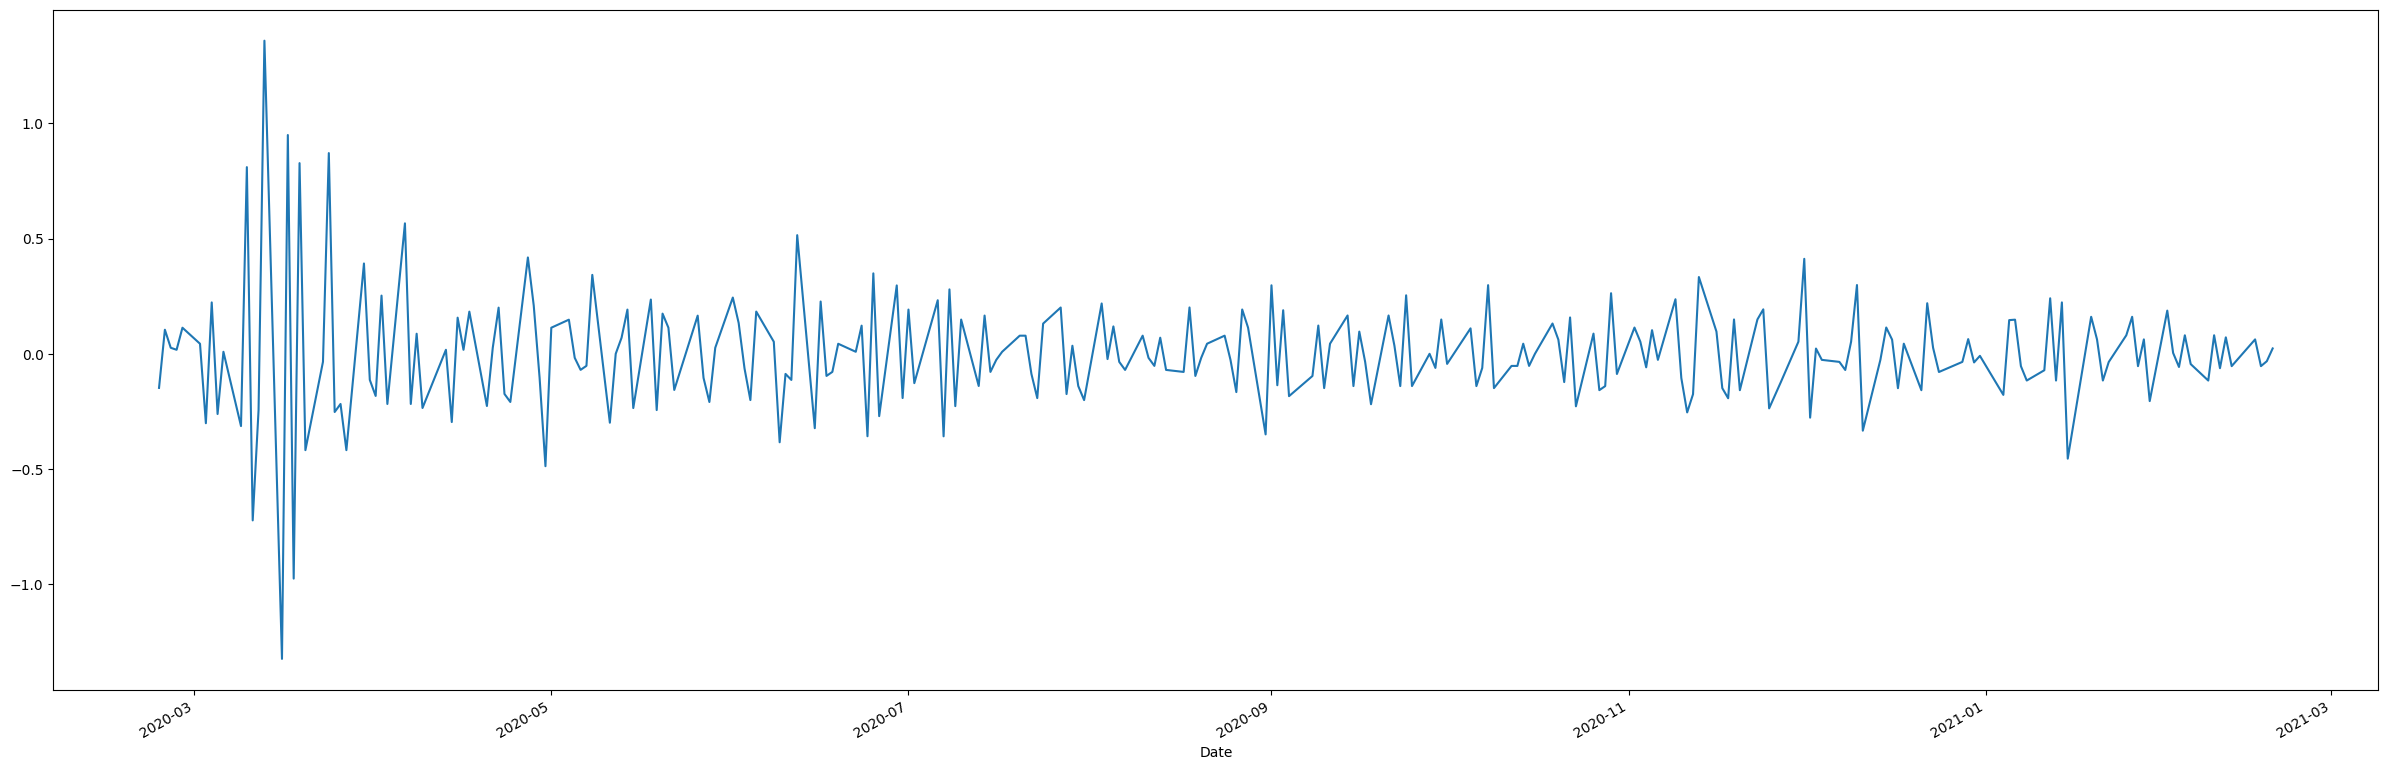

In [10]:
diff_2 = diff.diff()
diff_2.plot(figsize=(30,10));

Automaticamente número de diferenciações

In [11]:
ndiffs(df['Adj Close'])

2

Akaike Information Criterion menor melhor

In [12]:

smodel = pm.auto_arima(df['Adj Close'],
                       start_p=1, max_p=3,
                       start_q=1, max_q=3,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-146.817, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=25.013, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-90.554, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-160.666, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=25.013, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-156.560, Time=0.48 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-152.203, Time=0.57 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-160.666, Time=0.31 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 2.348 seconds


In [13]:
df['Adj Close'].size

253

In [14]:
train = df['Adj Close'][0:round(df['Adj Close'].size*0.97)]
test = df['Adj Close'][round(df['Adj Close'].size*0.97):]

# Construindo modelo a partir do resultado anterior de melhor modelo
arima = ARIMA(train, order=(1, 1, 1))  
arima = arima.fit()



forecast_results = arima.get_forecast(len(test), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
forecast.index = test.index
forecast

Date
2021-02-09    4.260577
2021-02-10    4.255146
2021-02-11    4.258111
2021-02-12    4.256492
2021-02-16    4.257376
2021-02-17    4.256893
2021-02-18    4.257157
2021-02-19    4.257013
Name: predicted_mean, dtype: float64

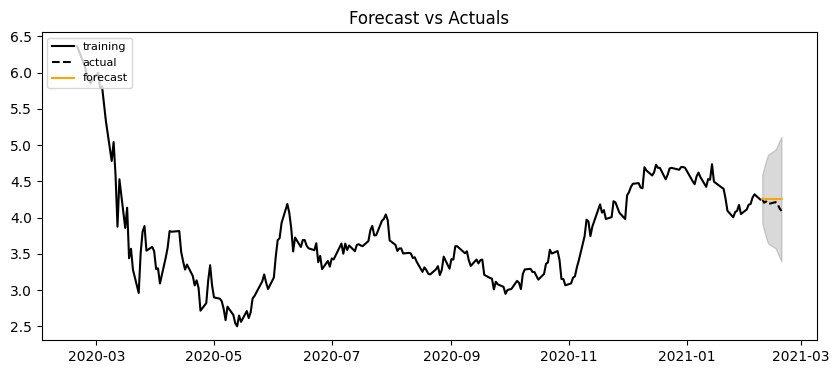

In [16]:
    fc_series = pd.Series(forecast, index=test.index)
    lower_series = pd.Series(confidence_int[:,0], index=test.index)
    upper_series = pd.Series(confidence_int[:,1], index=test.index)

    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);


In [17]:
forecast_results = arima.forecast(len(test)+2, alpha=0.05)
#forecast_results[forecast_results.size-1]
forecast_results.iloc[-1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


4.257048508570836

In [18]:
web.get_data_yahoo("^BVSP", start=dt.datetime(2021,2,20), end=dt.datetime(2021,2,23))['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2021-02-22    112668.0
Name: Adj Close, dtype: float64